# Optimizing a portfolio

### Question 1


Load the data and rearrange it as a pandas DataFrame with the following structure:

- One column per stock and concept: Open, High, Low, Close, Volume
- Date as index (properly parsed)
- Rows sorted by date, ascending

Be ready for dealing with errors in the names and some missing values.

Paste here the `.dtypes` of the resulting DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as ran

In [2]:
df = pd.read_csv("stocks_unclean.csv")
df.head()

,date,variable,value
0,2020-07-14,high_AAPL,9.725500e+01
1,2021-10-22,volume_AMZN,3.139100e+06
2,2021-06-04,volume_MSFT,2.528110e+07
3,2021-06-28,volume_AMZN,2.242800e+06
4,2021-11-23,low_GOOG,NaN


Below, I am properly parsing the Date as index

In [3]:
df = pd.read_csv("stocks_unclean.csv", parse_dates=["date"], dayfirst=True,index_col = "date")
df.head()

,variable,value
date,,
2020-07-14,high_AAPL,9.725500e+01
2021-10-22,volume_AMZN,3.139100e+06
2021-06-04,volume_MSFT,2.528110e+07
2021-06-28,volume_AMZN,2.242800e+06
2021-11-23,low_GOOG,NaN


Below, I am checking all the different variables (different mispellings of the stocks)

In [4]:
df["variable"].unique()

array(['high_AAPL', 'volume_AMZN', 'volume_MSFT', 'low_GOOG', 'open_AMZN',
       'volume_AAPL', 'open_MSFT', 'open_AAPL', 'close_GOOG', 'low_AMZN',
       'close_AAPL', 'volume_GOOG', 'open_GOOG', 'high_AMZN', 'low_AAPL',
       'low_MSFT', 'high_MSFT', 'high_GOOG', 'close_AMZN', 'close_MSFT',
       'low_APL', 'high_GOG', nan, 'volume_MST', 'high_AMZ', 'low_AMZ',
       'close_AMZ', 'high_MST', 'open_GOG', 'open_MST', 'close_GOG',
       'high_APL', 'low_GOG', 'close_APL', 'volume_APL', 'open_APL',
       'volume_GOG', 'open_AMZ', 'low_MST', 'volume_AMZ', 'close_MST'],
      dtype=object)

Below, I am creating 2 new columns in the data frame on the splitting of varliable on "_" to fix the misspellings of the stock name

In [5]:
df[["volume_type", "name"]] = df["variable"].str.split("_", n=1, expand=True)
df.head()

,variable,value,volume_type,name
date,,,,
2020-07-14,high_AAPL,9.725500e+01,high,AAPL
2021-10-22,volume_AMZN,3.139100e+06,volume,AMZN
2021-06-04,volume_MSFT,2.528110e+07,volume,MSFT
2021-06-28,volume_AMZN,2.242800e+06,volume,AMZN
2021-11-23,low_GOOG,NaN,low,GOOG


In [6]:
df["name"].unique()

array(['AAPL', 'AMZN', 'MSFT', 'GOOG', 'APL', 'GOG', nan, 'MST', 'AMZ'],
      dtype=object)

Below, I am using replace() to correct the misspellings of the stocks

In [7]:
df["name"].replace({'APL':'AAPL','GOG':'GOOG','AMZ':'AMZN','MST':'MSFT'},inplace = True)
df["name"].unique()

array(['AAPL', 'AMZN', 'MSFT', 'GOOG', nan], dtype=object)

Below, I am removing all rows with a missing value in it's name

In [8]:
df = df[df["name"].notna()]
df["name"].unique()

array(['AAPL', 'AMZN', 'MSFT', 'GOOG'], dtype=object)

In [9]:
df = df.drop(columns = "variable")
df.head()

,value,volume_type,name
date,,,
2020-07-14,9.725500e+01,high,AAPL
2021-10-22,3.139100e+06,volume,AMZN
2021-06-04,2.528110e+07,volume,MSFT
2021-06-28,2.242800e+06,volume,AMZN
2021-11-23,NaN,low,GOOG


In [10]:
df.sort_values("date")

,value,volume_type,name
date,,,
2019-12-31,1.847840e+03,close,AMZN
2019-12-31,1.008056e+08,volume,AAPL
2019-12-31,7.238000e+01,low,AAPL
2019-12-31,1.842000e+03,open,AMZN
2019-12-31,1.577000e+02,close,MSFT
...,...,...,...
2022-01-25,1.589800e+02,open,AAPL
2022-01-25,2.844850e+03,open,AMZN
2022-01-25,2.949900e+02,high,MSFT


In [11]:
df = df.loc[:, df.isnull().mean() <.7]
df.head()

,value,volume_type,name
date,,,
2020-07-14,9.725500e+01,high,AAPL
2021-10-22,3.139100e+06,volume,AMZN
2021-06-04,2.528110e+07,volume,MSFT
2021-06-28,2.242800e+06,volume,AMZN
2021-11-23,NaN,low,GOOG


Here, I am using pivot table to create a table of each stock name and volume type, indexed on the sorted date

In [12]:
df1 = df.pivot_table(index = 'date', columns = ['name','volume_type'],values = 'value')

df1.head(10)

name              AAPL                                                \
volume_type      close       high        low       open       volume   
date                                                                   
2019-12-31   73.412498  73.419998  72.379997  72.482498  100805600.0   
2020-01-02   75.087502  75.150002  73.797501  74.059998  135480400.0   
2020-01-03   74.357498  75.144997  74.125000  74.287498  146322800.0   
2020-01-06   74.949997  74.989998  73.187500  73.447502  118387200.0   
2020-01-07   74.597504  75.224998  74.370003  74.959999  108872000.0   
2020-01-08   75.797501  76.110001  74.290001  74.290001  132079200.0   
2020-01-09   77.407501  77.607498  76.550003  76.809998  170108400.0   
2020-01-10   77.582497  78.167503  77.062500  77.650002  140644800.0   
2020-01-13   79.239998  79.267502  77.787498  77.910004  121532000.0   
2020-01-14   78.169998  79.392502  78.042503  79.175003  161954400.0   

name                AMZN                                                    \
volume_type        close         high          low         open     volume   
date                                                                         
2019-12-31   1847.839966  1853.260010  1832.229980  1842.000000  2506500.0   
2020-01-02   1898.010010  1898.010010  1864.150024  1875.000000  4029000.0   
2020-01-03   1874.969971  1886.199951  1864.500000  1864.500000  3764400.0   
2020-01-06   1902.880005  1903.689941  1860.000000  1860.000000  4061800.0   
2020-01-07   1906.859985  1913.890015  1892.040039  1904.500000  4044900.0   
2020-01-08   1891.969971  1911.000000  1886.439941  1898.040039  3508000.0   
2020-01-09   1901.050049  1917.819946  1895.800049  1909.890015  3167300.0   
2020-01-10   1883.160034  1906.939941  1880.000000  1905.369995  2853700.0   
2020-01-13   1891.300049  1898.000000  1880.800049  1891.310059  2780800.0   
2020-01-14   1869.439941  1887.109985  1858.550049  1885.880005  3440900.0   

name                GOOG                                                    \
volume_type        close         high          low         open     volume   
date                                                                         
2019-12-31   1337.020020  1338.000000  1329.084961  1330.109985   961800.0   
2020-01-02   1367.369995  1368.140015  1341.550049  1341.550049  1406600.0   
2020-01-03   1360.660034  1372.500000  1345.543945  1347.859985  1186400.0   
2020-01-06   1394.209961  1396.500000          NaN  1350.000000  1732300.0   
2020-01-07   1393.339966  1402.989990  1390.380005  1397.939941  1502700.0   
2020-01-08   1404.319946  1411.579956  1390.839966  1392.079956  1528000.0   
2020-01-09   1419.829956  1427.329956  1410.270020  1420.569946  1500900.0   
2020-01-10   1429.729980  1434.928955  1418.349976  1427.560059  1820700.0   
2020-01-13   1439.229980  1440.520020  1426.020020  1436.130005  1652300.0   
2020-01-14   1430.880005  1441.800049  1428.369995  1439.010010  1558900.0   

name               MSFT                                                  
volume_type       close        high         low        open      volume  
date                                                                     
2019-12-31   157.699997  157.770004  156.449997  156.770004  18369400.0  
2020-01-02   160.619995  160.729996  158.330002  158.779999  22622100.0  
2020-01-03   158.619995  159.949997         NaN  158.320007  21116200.0  
2020-01-06   159.029999  159.100006  156.509995  157.080002  20813700.0  
2020-01-07   157.580002  159.669998  157.320007  159.320007  21634100.0  
2020-01-08   160.089996  160.800003  157.949997  158.929993  27746500.0  
2020-01-09   162.089996  162.220001  161.029999  161.839996  21385000.0  
2020-01-10   161.339996  163.220001  161.179993  162.820007  20725900.0  
2020-01-13   163.279999  163.309998  161.259995  161.759995  21626500.0  
2020-01-14   162.130005  163.600006  161.720001  163.389999  23477400.0

In [13]:
df1.isna().sum()

name  volume_type
AAPL  close           7
      high            8
      low             8
      open            8
      volume         13
AMZN  close           4
      high            6
      low             4
      open            3
      volume          2
GOOG  close           7
      high            2
      low             2
      open            2
      volume          7
MSFT  close           2
      high            2
      low             3
      open            4
      volume          6
dtype: int64

As seen above there are multiple empty cells in our table
Interpolate is a way to fill NaN values based on linearity

In [14]:
df1 = df1.interpolate(method = "linear",limit_direction ="forward")

In [15]:
df1.isna().sum()

name  volume_type
AAPL  close          0
      high           0
      low            0
      open           0
      volume         0
AMZN  close          0
      high           0
      low            0
      open           0
      volume         0
GOOG  close          0
      high           0
      low            0
      open           0
      volume         0
MSFT  close          0
      high           0
      low            0
      open           0
      volume         0
dtype: int64

In [16]:
df1.dtypes

name  volume_type
AAPL  close          float64
      high           float64
      low            float64
      open           float64
      volume         float64
AMZN  close          float64
      high           float64
      low            float64
      open           float64
      volume         float64
GOOG  close          float64
      high           float64
      low            float64
      open           float64
      volume         float64
MSFT  close          float64
      high           float64
      low            float64
      open           float64
      volume         float64
dtype: object

### Question 2
Visualize the data as follows:

- Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
- Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
- Add meaningful visualizations of your choice (0.5 points)

Attach the plots here.

In [17]:
#old way 
#open_dict_dfs = {}
#for name in df["name"].unique():
#    open_dict_dfs[name] = df.loc[df["name"] == name, ]
#    open_dict_dfs[name] =  open_dict_dfs[name].loc[open_dict_dfs[name]["volume_type"]=="open", "value"]
#open_dict_dfs["GOOG"].head()

In [18]:
#old way 
#close_dict_dfs = {}
#for name in df["name"].unique():
#    close_dict_dfs[name] = df.loc[df["name"] == name, ]
#    close_dict_dfs[name] =  close_dict_dfs[name].loc[close_dict_dfs[name]["volume_type"]=="close", "value"]
#close_dict_dfs["GOOG"].head()

In [19]:
#old way
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

#df1["AAPL"]["open"].plot(title = "AAPL",label="open", ax=axes[0,0],color="green")
#df1["AAPL"]["close"].plot(label="close", ax=axes[0,0],color="red")
#axes[0,0].legend()

#df1["AMZN"]["open"].plot(title = "AMZN", label="open", ax=axes[0,1],color="green")
#df1["AMZN"]["close"].plot(label="close", ax=axes[0,1],color="red")
#axes[0,1].legend()


#df1["GOOG"]["open"].plot(title = "GOOG", label="open", ax=axes[1,0],color="green")
#df1["GOOG"]["close"].plot(label="close", ax=axes[1,0],color="red")
#axes[1,0].legend()


#df1["MSFT"]["open"].plot(title = "MSFT", label="open", ax=axes[1,1],color="green")
#df1["MSFT"]["close"].plot(label="close", ax=axes[1,1],color="red")
#axes[1,1].legend()

In [20]:
#old way
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

#df1["AAPL"]["open"].resample("W").mean().plot(title = "AAPL",label="open", ax=axes[0,0],color="green")
#df1["AAPL"]["close"].resample("W").mean().plot(label="close", ax=axes[0,0],color="red")
#axes[0,0].legend()

#df1["AMZN"]["open"].resample("W").mean().plot(title = "AMZN", label="open", ax=axes[0,1],color="green")
#df1["AMZN"]["close"].resample("W").mean().plot(label="close", ax=axes[0,1],color="red")
#axes[0,1].legend()


#df1["GOOG"]["open"].resample("W").mean().plot(title = "GOOG", label="open", ax=axes[1,0],color="green")
#df1["GOOG"]["close"].resample("W").mean().plot(label="close", ax=axes[1,0],color="red")
#axes[1,0].legend()


#df1["MSFT"]["open"].resample("W").mean().plot(title = "MSFT", label="open", ax=axes[1,1],color="green")
#df1["MSFT"]["close"].resample("W").mean().plot(label="close", ax=axes[1,1],color="red")
#axes[1,1].legend()

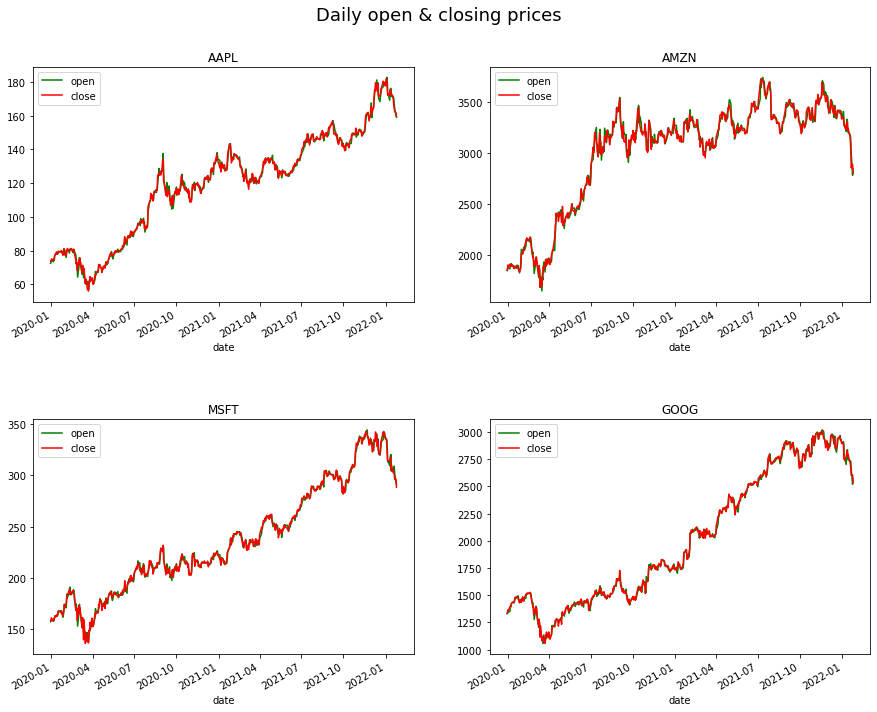

In [21]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

plt.suptitle("Daily open & closing prices", fontsize=18, y=0.95)

# loop through the length of unique stocks and keep track of index
for n, name in enumerate(df["name"].unique()):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df on unique name and plot open and closed prices on the new subplot axis
    df1[name]["open"].plot(ax=ax, label="open",color="green")
    df1[name]["close"].plot(ax=ax, label="close",color="red")


    # chart formatting
    ax.set_title(name)
    ax.legend()

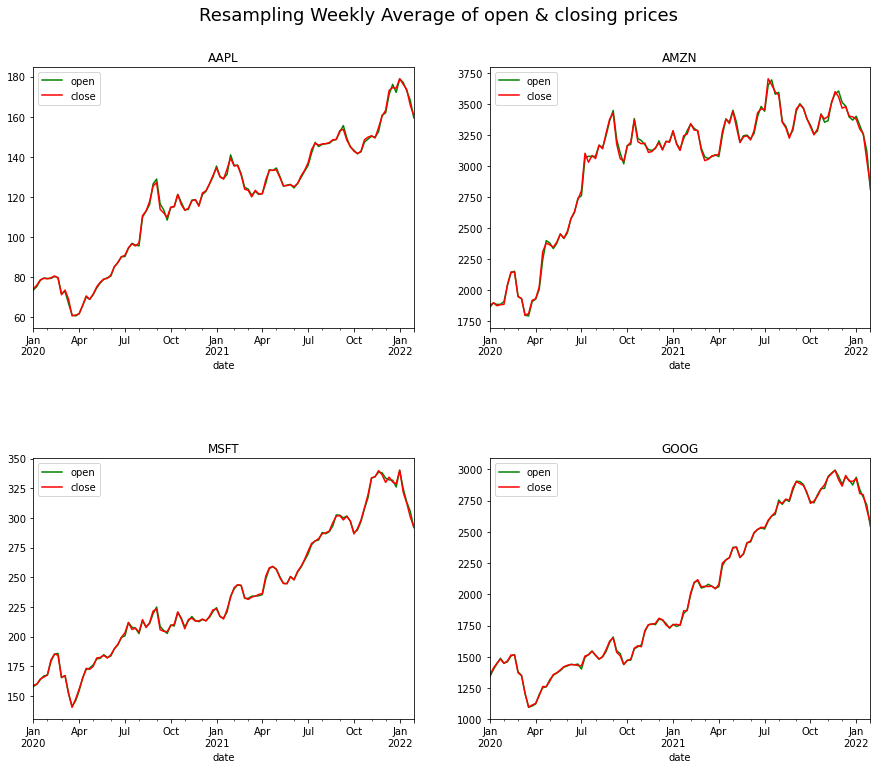

In [22]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

plt.suptitle("Resampling Weekly Average of open & closing prices", fontsize=18, y=0.95)

# loop through the length of unique stocks and keep track of index
for n, name in enumerate(df["name"].unique()):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df on unique name and plot open and closed prices of the weekly average mean on the new subplot axis
    df1[name]["open"].resample("W").mean().plot(ax=ax, label="open",color="green")
    df1[name]["close"].resample("W").mean().plot(ax=ax, label="close",color="red")


    # chart formatting
    ax.set_title(name)
    ax.legend()

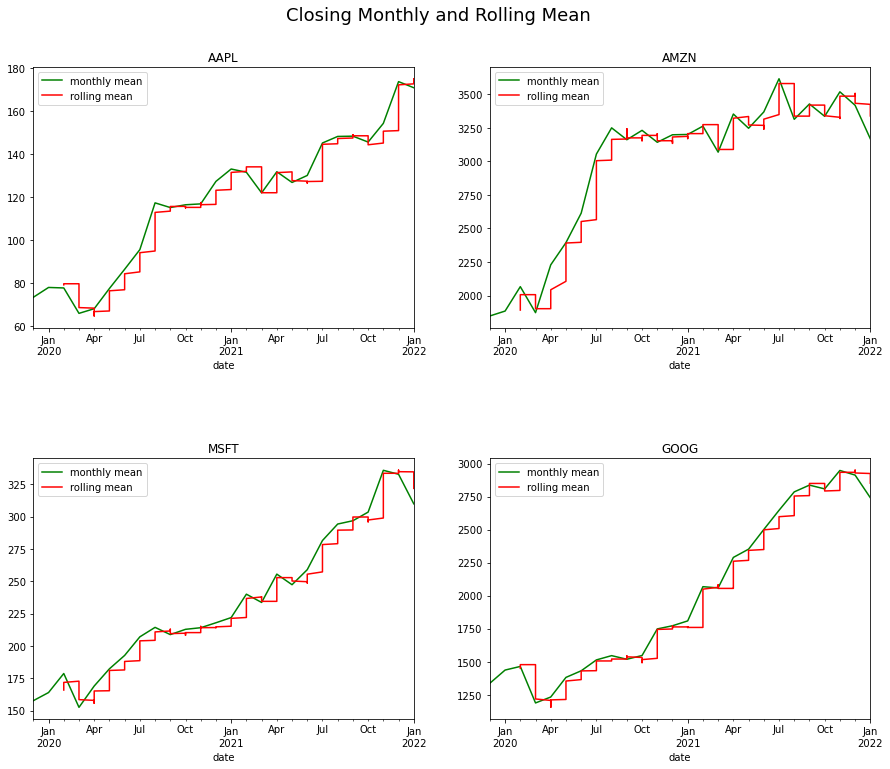

In [23]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

plt.suptitle("Closing Monthly and Rolling Mean", fontsize=18, y=0.95)

# loop through the length of unique stocks and keep track of index
for n, name in enumerate(df["name"].unique()):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df on unique name and plot monthly mean and rolling mean of closing prices on the new subplot axis
    df1[name]["close"].resample("M").mean().plot(ax=ax, label="monthly mean",color="green")
    df1[name]["close"].rolling(30).median().plot(ax=ax, label="rolling mean",color="red")


    # chart formatting
    ax.set_title(name)
    ax.legend()

### Question 3
Create a function that calculates the Return of Investment (ROI). Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. The ROI formula is:

ROI = (FVI - IVI) / IVI * 100


- VI: initial value of investment. This is the price at which you bought the stock
- FVI: final value of investment. This is the price at which you sold the stock
- ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:

- lookback: the number of days you hold the stock
- name: the name of the stock, using the "Close" value of the stock
- data: the dataframe with the stock data

Paste here the result of `roi(365, "GOOG", df)`.

In [24]:
##this is how i undertood it at first 
#def roi(lookback, name, data):
#    ROI = (data[f"{name}"]["close"] - data[f"{name}"]["close"].shift(lookback))/ data[f"{name}"]["close"].shift(lookback)*100
#    return ROI

##wrong
#r = roi(365, "GOOG", df1)
#r

In [25]:
#after talking to others who invest i think this is the correct way to calculate the roi 
def roi(lookback,name,data): 
    idx = list(data.loc[:, (f"{name}", "close")].index)
    fvi = data.loc[idx[-lookback]:,(f"{name}", "close")] 
    ivi = data.loc[idx[-lookback]:, (f"{name}", "close")].shift(1)
        
    ROI = (((fvi-ivi)/ivi)*100).cumsum()
    
    return ROI

In [26]:
r1 = roi(365, "GOOG", df1)
r1

date
2020-08-14          NaN
2020-08-17     0.679830
2020-08-18     3.355754
2020-08-19     2.645505
2020-08-20     4.856769
                ...    
2022-01-19    63.408592
2022-01-20    61.826966
2022-01-21    59.269420
2022-01-24    59.484647
2022-01-25    56.695321
Name: (GOOG, close), Length: 365, dtype: float64

### Question 4

Apply the ROI function to the portfolio. Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

- ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
- ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
- ROI after holding the stock for 90 days (green, solid line) (0.5 points)

Attach here the ROI plots for AMZN.

In [27]:
##very repetitive 
#roi_AMZN_365 = roi(365, "AMZN", df1)
#roi_AMZN_180 = roi(180, "AMZN", df1)
#roi_AMZN_90 = roi(90, "AMZN", df1)

#roi_AAPL_365 = roi(365, "AAPL", df1)
#roi_AAPL_180 = roi(180, "AAPL", df1)
#roi_AAPL_90 = roi(90, "AAPL", df1)

#roi_GOOG_365 = roi(365, "GOOG", df1)
#roi_GOOG_180 = roi(180, "GOOG", df1)
#roi_GOOG_90 = roi(90, "GOOG", df1)

#roi_MSFT_365 = roi(365, "MSFT", df1)
#roi_MSFT_180 = roi(180, "MSFT", df1)
#roi_MSFT_90 = roi(90, "MSFT", df1)

In [28]:
## based off of previous cell
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

#roi_AMZN_365.plot(title = "ROI plots for AMZN", color="red", label="ROI 365", linestyle = "dashed",  ax=axes[0,0])
#roi_AMZN_180.plot(color="blue", label="ROI 180", linestyle = "dotted", ax=axes[0,0])
#roi_AMZN_90.plot(color="green", label="ROI 90", linestyle = "solid", ax=axes[0,0])
#axes[0,0].legend()

#roi_AAPL_365.plot(title = "ROI plots for AAPL", color="red", label="ROI 365", linestyle = "dashed",  ax=axes[1,0])
#roi_AAPL_180.plot(color="blue", label="ROI 180", linestyle = "dotted", ax=axes[1,0])
#roi_AAPL_90.plot(color="green", label="ROI 90", linestyle = "solid", ax=axes[1,0])
#axes[1,0].legend()

#roi_GOOG_365.plot(title = "ROI plots for GOOG", color="red", label="ROI 365", linestyle = "dashed",  ax=axes[0,1])
#roi_GOOG_180.plot(color="blue", label="ROI 180", linestyle = "dotted", ax=axes[0,1])
#roi_GOOG_90.plot(color="green", label="ROI 90", linestyle = "solid", ax=axes[0,1])
#axes[0,1].legend()

#roi_MSFT_365.plot(title = "ROI plots for MSFT", color="red", label="ROI 365", linestyle = "dashed",  ax=axes[1,1])
#roi_MSFT_180.plot(color="blue", label="ROI 180", linestyle = "dotted", ax=axes[1,1])
#roi_MSFT_90.plot(color="green", label="ROI 90", linestyle = "solid", ax=axes[1,1])
#axes[1,1].legend()

In [29]:
#created a dict to save all the rois of all stocks and diff holds 
#created a dict with different holds and their corresponding features for graphing to make it easy while iterating over them

stocks_roi = {}
roi_hold = {90:["red","dashed"], 180: ["blue","dotted"], 365:["green","solid"]}

for name in df["name"].unique():
    for hold in roi_hold:
        stocks_roi["roi"+name+str(hold)] = roi(hold, name, df1)

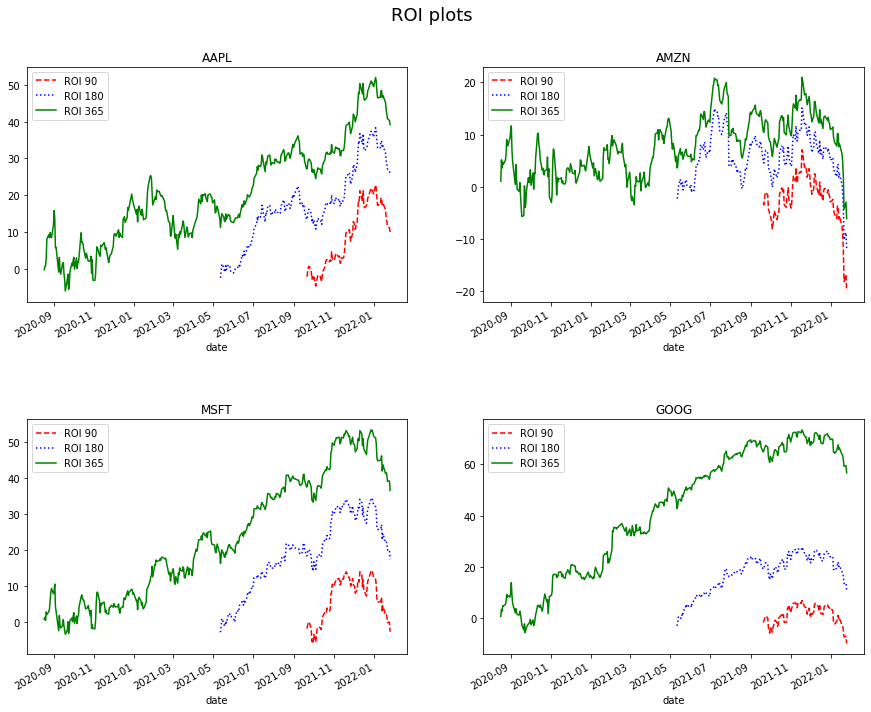

In [30]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

plt.suptitle("ROI plots", fontsize=18, y=0.95)

# loop through the length of unique stocks and keep track of index
for n, name in enumerate(df["name"].unique()):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df on unique name and plot open and closed prices of the weekly average mean on the new subplot axis
    for hold in roi_hold:
        stocks_roi["roi"+name+str(hold)].plot(ax=ax, label="ROI " + str(hold), color= str(roi_hold[hold][0]), linestyle =str(roi_hold[hold][1]))

    # chart formatting
    ax.set_title(name)
    ax.legend()

### Question 5
The average ROI is a single number that comes from computing the overall mean of the ROI over the whole period of the series. Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? (Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)



   Portfolio 1:

       AAPL 40%

       GOOG 30%

       MSFT 20%

       AMZN 10%



   Portfolio 2:

       AAPL 30%

       GOOG 20%

       MSFT 10%

       AMZN 40%



Paste here the average ROI of both portfolios (two numbers).

In [31]:
##first interpretation of how to calculate the roi mean (incorrect)

#roi_mean_AAPL = [roi_AAPL_365/100 * df1["AAPL"]["close"].mean()]

#def roi_mean(lookback, name, data):
#    mean_roi = (roi(lookback,name,data)/100 * data[f"{name}"]["close"]).mean()
#    return mean_roi

#roi_mean(365, "AAPL", df1)

In [32]:
def roi_mean(lookback, name, data):
    roi_clean= roi(lookback,name,data).dropna()
    roi_clean = np.cumsum(roi_clean[::-1][::-1])
    mean_roi = (sum(roi_clean/100)) / lookback
    return mean_roi

Portfolio 1

In [33]:
portfolio1 = (roi_mean(365, "AAPL", df1)*0.4) + (roi_mean(365, "GOOG", df1)*0.3) + (roi_mean(365, "MSFT", df1)*0.2) + (roi_mean(365, "AMZN", df1)*.1)
print("The average ROI of portfolioi 1 is " + str(round(portfolio1,2)))

The average ROI of portfolioi 1 is 31.44


Portfolio 2

In [34]:
portfolio2 = (roi_mean(365, "AAPL", df1)*0.3) + (roi_mean(365, "GOOG", df1)*0.2) + (roi_mean(365, "MSFT", df1)*0.1) + (roi_mean(365, "AMZN", df1)*.4)
print("The average ROI of portfolioi 2 is " + str(round(portfolio2,2)))

The average ROI of portfolioi 2 is 24.37


### Question 6
Find a better combination in your portfolio. The new combination should beat the best portfolio that you found in the previous exercise.



In [35]:
#function that returns n numbers that sum up to x 
def sum_to_x(n, x):
    values = [0.0, x] + list(np.random.uniform(low=0.0,high=x,size=n-1))
    values.sort()
    return [values[i+1] - values[i] for i in range(n)]

In [36]:
#here i used a while loop because we need to find a better combition that the current porfolios that we have 
#it iterates until the portfolio created is better than the best porfolio (portfolio1 vs porfolio2) 
#every time we run there will be a different better portfolio since the numbers generated are random 

better_portfolio = 0
better_weights = []

while better_portfolio < max(portfolio1, portfolio2):
    r = sum_to_x(4, 1.0)
    p = (roi_mean(365, "AAPL", df1)*r[0]) + (roi_mean(365, "GOOG", df1)*r[1]) + (roi_mean(365, "MSFT", df1)*r[2]) + (roi_mean(365, "AMZN", df1)*r[3])
    if better_portfolio < p :
        better_portfolio = p
        better_weights = r 

In [37]:
print("Better Portfolio: \n\n AAPL " +  str(round(better_weights[0]*100,2)) + "%\n GOOG " + str(round(better_weights[1]*100,2)) + "%\n MSFT " + str(round(better_weights[2]*100,2)) + "%\n AMZN " + str(round(better_weights[3]*100,2))+ "%\n \nwith an average ROI of " + str(round(better_portfolio,2)))

Better Portfolio: 

 AAPL 0.98%
 GOOG 42.67%
 MSFT 55.62%
 AMZN 0.73%
 
with an average ROI of 36.71
